# Sentiment Analysis On Tweets

In [1]:
import pandas as pd

In [2]:
# load the dataset
df=pd.read_csv("Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

In [5]:
df.text[0]

'@VirginAmerica What @dhepburn said.'

In [6]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
tweets=df[["text","airline_sentiment"]]

In [8]:
tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [9]:
tweets.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [10]:
tweets.shape

(14640, 2)

In [11]:
# Take sentiments as only binary Classifier
tweet_final=tweets[tweets["airline_sentiment"]!="neutral"]

In [12]:
tweet_final

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative


In [13]:
# Total number of tweets accoeding to sentiments
tweet_final["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [14]:
# Convert labels to integer value by factorize method
sentiment_label = tweet_final.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

# text into an array of vector embeddings.

In [15]:
tweet_data=tweet_final["text"].values

In [16]:
tweet_data

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [17]:
# installing tensorflow
pip install pandas matplotlib tensorflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
#tokens are created from sklearn library keras

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet_data)

In [19]:
# encoded data
encoded_data = tokenizer.texts_to_sequences(tweet_data)


In [20]:
# vocab size is length of vocabaloury
vocab_size = len(tokenizer.word_index) + 1


In [37]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'united': 5,
 'you': 6,
 'for': 7,
 'flight': 8,
 'and': 9,
 'on': 10,
 'my': 11,
 'usairways': 12,
 'americanair': 13,
 'is': 14,
 'in': 15,
 'southwestair': 16,
 'of': 17,
 'jetblue': 18,
 'me': 19,
 'your': 20,
 'it': 21,
 'was': 22,
 'not': 23,
 'no': 24,
 'have': 25,
 'at': 26,
 'with': 27,
 'that': 28,
 'this': 29,
 'get': 30,
 'but': 31,
 'be': 32,
 'cancelled': 33,
 'thanks': 34,
 'now': 35,
 'service': 36,
 'are': 37,
 'we': 38,
 'from': 39,
 'an': 40,
 'been': 41,
 'just': 42,
 '2': 43,
 'so': 44,
 'customer': 45,
 'help': 46,
 't': 47,
 'can': 48,
 'time': 49,
 'co': 50,
 'up': 51,
 'hours': 52,
 'http': 53,
 'do': 54,
 'hold': 55,
 'they': 56,
 'out': 57,
 'amp': 58,
 'plane': 59,
 "i'm": 60,
 'us': 61,
 'all': 62,
 'will': 63,
 'why': 64,
 'thank': 65,
 'still': 66,
 'our': 67,
 'delayed': 68,
 'what': 69,
 'when': 70,
 'how': 71,
 'one': 72,
 "can't": 73,
 'flights': 74,
 'call': 75,
 'gate': 76,
 'hour': 77,
 'had': 78,
 'flightled

In [21]:
encoded_data

[[103, 575, 530, 1287, 2416, 1, 2, 177],
 [103, 88, 124, 3255, 1, 4076, 4077, 957, 15, 20, 4078, 58, 56, 25, 482, 2417],
 [103, 9, 88, 4, 124, 439, 196, 483, 86, 21],
 [103,
  388,
  83,
  281,
  219,
  4,
  8,
  7,
  205,
  28,
  198,
  25,
  29,
  2167,
  88,
  124,
  2,
  122,
  196,
  483,
  86,
  151,
  1977],
 [103, 184, 1348, 297, 49, 3, 114, 2418, 29, 1978, 150, 450],
 [103, 233, 3, 35, 3, 54, 1225],
 [103, 21, 22, 337, 9, 521, 40, 77, 347, 231, 174, 138, 1, 19],
 [103, 3, 710, 97, 650, 44, 172, 203, 154, 1225],
 [103,
  29,
  14,
  543,
  4,
  110,
  669,
  226,
  1603,
  86,
  11,
  636,
  207,
  1,
  58,
  3,
  365,
  126,
  864,
  10,
  11,
  406,
  207,
  252,
  1705],
 [103,
  60,
  151,
  20,
  1825,
  1510,
  96,
  112,
  160,
  62,
  2,
  1706,
  450,
  39,
  197,
  53,
  47,
  50],
 [103, 34],
 [103, 317, 1511, 958, 14, 66, 711],
 [103,
  44,
  879,
  7,
  11,
  166,
  1288,
  844,
  8,
  291,
  1,
  682,
  118,
  552,
  229,
  31,
  110,
  494,
  86,
  1103,
  1422],

In [38]:
# Creating equal dimension array of differnet words by padding

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_data, maxlen=200)

In [23]:
padded_sequence

array([[   0,    0,    0, ...,    1,    2,  177],
       [   0,    0,    0, ...,   25,  482, 2417],
       [   0,    0,    0, ...,  483,   86,   21],
       ...,
       [   0,    0,    0, ...,    8,    1,  480],
       [   0,    0,    0, ..., 1682,   45,  945],
       [   0,    0,    0, ...,  144,   11, 2325]])

# Build the Text Classifier

In [24]:
# Creating model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding



embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

# Training the model

In [25]:
#Train the  model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
289/289 [==============================] - 77s 252ms/step - loss: 0.4040 - accuracy: 0.8329 - val_loss: 0.2064 - val_accuracy: 0.9207
Epoch 2/5
289/289 [==============================] - 62s 214ms/step - loss: 0.2167 - accuracy: 0.9155 - val_loss: 0.1721 - val_accuracy: 0.9376
Epoch 3/5
289/289 [==============================] - 54s 188ms/step - loss: 0.1653 - accuracy: 0.9376 - val_loss: 0.1598 - val_accuracy: 0.9446
Epoch 4/5
289/289 [==============================] - 56s 193ms/step - loss: 0.1334 - accuracy: 0.9522 - val_loss: 0.1693 - val_accuracy: 0.9467
Epoch 5/5
289/289 [==============================] - 59s 204ms/step - loss: 0.1149 - accuracy: 0.9584 - val_loss: 0.1859 - val_accuracy: 0.9480


In [27]:
history

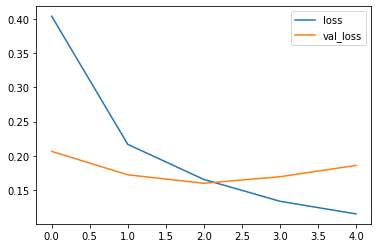

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot between losss ana Val_loss

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

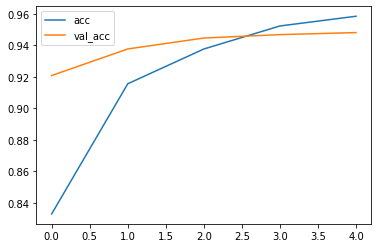

<Figure size 432x288 with 0 Axes>

In [29]:
# plot between acrruacy and val_accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

# Prediction

In [30]:
# predicting Function

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])




In [31]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)



Predicted label:  positive


In [32]:
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  negative


# Summary